In [193]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 



In [194]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score, accuracy_score, confusion_matrix 
from sklearn.cluster import KMeans 
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA

In [195]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-3-insurance.csv')
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [196]:
mis_val = data.isna().sum() * 100/len(data)

mis_val.sort_values(ascending=False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [197]:
data.duplicated().sum()

data.drop_duplicates(subset=None, inplace=True, ignore_index=False, keep='last')

data.duplicated().sum()

0

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [199]:
orig_sex = data.sex 
orig_sex_dic = np.unique(data.sex)

le = LabelEncoder()

data.sex = le.fit_transform(data.sex)
data.smoker = le.fit_transform(data.smoker)
data.region = le.fit_transform(data.region)

le_sex = data.sex 

le_sex_dic = np.unique(le_sex)

sex_dic = dict(zip(orig_sex_dic,le_sex_dic))
sex_dic

{'female': 0, 'male': 1}

<AxesSubplot:title={'center':'Correlation Matrix'}>

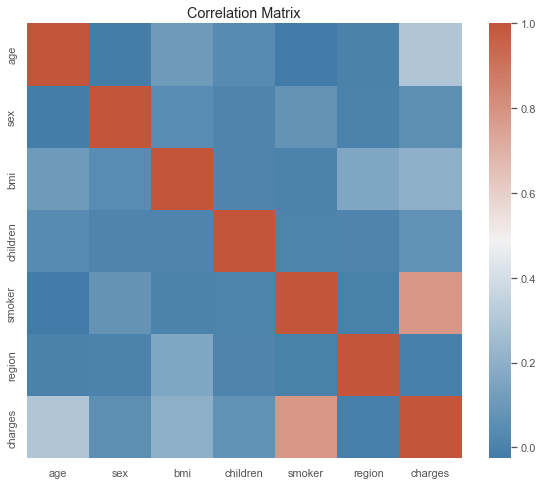

In [200]:
data_corr = data.corr()

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,20, as_cmap=True), square=True, ax=ax)

In [201]:
y = data.charges 
x = data.drop(['charges'], axis=1)
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [202]:
scaler = StandardScaler() 

x = pd.DataFrame(scaler.fit_transform(x))

y = scaler.fit_transform(np.array(y).reshape(-1,1))
y

array([[ 0.2978567 ],
       [-0.9543806 ],
       [-0.72937251],
       ...,
       [-0.96228744],
       [-0.9310536 ],
       [ 1.31029752]])

In [203]:
x

,0,1,2,3,4,5
0,-1.440418,-1.009771,-0.453160,-0.909234,1.969660,1.343163
1,-1.511647,0.990324,0.509422,-0.079442,-0.507702,0.438017
2,-0.799350,0.990324,0.383155,1.580143,-0.507702,0.438017
3,-0.443201,0.990324,-1.305052,-0.909234,-0.507702,-0.467128
4,-0.514431,0.990324,-0.292456,-0.909234,-0.507702,-0.467128
...,...,...,...,...,...,...
1332,0.767704,0.990324,0.050269,1.580143,-0.507702,-0.467128
1333,-1.511647,-1.009771,0.206053,-0.909234,-0.507702,-1.372274
1334,-1.511647,-1.009771,1.014490,-0.909234,-0.507702,0.438017
1335,-1.297958,-1.009771,-0.797524,-0.909234,-0.507702,1.343163


In [204]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.3)

In [205]:
linreg = LinearRegression()

linreg.fit(x_train,y_train)

y_pred = linreg.predict(x_test)

scr_r2 = r2_score(y_test,y_pred).round(3)

scr_mse = mean_squared_error(y_test,y_pred).round(3)

In [206]:
# modperf = pd.DataFrame(
#     'LinearRegression', scr_r2,scr_mse
# ).transpose()

# modperf.columns = ['Method', 'Test R2', 'Test Mse']

# modperf

In [207]:
mod_perf = pd.DataFrame( [
    'LinearRegression', scr_r2, scr_mse]
).transpose()

mod_perf.columns = ['Method', 'Test R2', 'Test Mse'] 

mod_perf

,Method,Test R2,Test Mse
0,LinearRegression,0.765,0.271


In [208]:
ranfor = RandomForestRegressor(n_estimators=100, n_jobs=-1, criterion='squared_error', random_state=42)

ranfor.fit(x_train,y_train) 

y_pred = ranfor.predict(x_test)

mse_ranf = mean_squared_error(y_test,y_pred).round(3)

modperf = pd.DataFrame( 
    [ 
        'RandomForestRegressor', mse_ranf
    ]
).transpose()

modperf.columns = ['Method', 'Mse Test']

modperf

C:\Users\amunv\AppData\Local\Temp\ipykernel_21516\3669933150.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



,Method,Mse Test
0,RandomForestRegressor,0.181
